In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('csv_files/ks-projects-201801.csv')

In [3]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


def change_date_launched(string):
    return dt.datetime.strptime(string, '%Y-%m-%d %H:%M:%S').date()

def change_date_deadline(string):
    return dt.datetime.strptime(string, '%Y-%m-%d').date()

def datediff(launched, dealine):
    return (deadline - launched).days

In [6]:
df['deadline'] = pd.to_datetime(pd.Series(df['deadline']), format="%Y-%m-%d")
df['launched'] = pd.to_datetime(pd.Series(df['launched']), format="%Y-%m-%d %H:%M:%S")

In [7]:
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

df['launched'] = df['launched'].apply(change_date_launched)
df['deadline'] = df['deadline'].apply(change_date_deadline)

In [8]:
df['length'] = df['deadline'] - df['launched']

In [9]:
df['length'] = df.length.dt.days

In [10]:
df['perc_pledged'] = df['usd_pledged_real'] / df['usd_goal_real']

In [11]:
#modify some columns and create new ones
df['year'] = df['launched'].dt.year
df['month'] = df['launched'].dt.month
df['state_n'] = df.state.apply(lambda x: 1 if x == 'successful' else 0)
df['cat_country'] = df['main_category'] + '-' + df['country']
df['pledge_backer'] = df['usd_pledged_real'] / df['backers']

In [12]:
df.drop(columns = ['goal', 'usd pledged'])

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,length,perc_pledged,year,month,state_n,cat_country,pledge_backer
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,58,0.000000,2015,8,0,Publishing-GB,NaN
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,59,0.080700,2017,9,0,Film & Video-US,161.400000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,44,0.004889,2013,1,0,Film & Video-US,73.333333
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,29,0.000200,2012,3,0,Music-US,1.000000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,55,0.065795,2015,7,0,Film & Video-US,91.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,50000.00,29,0.000500,2014,9,0,Film & Video-US,25.000000
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,155.0,failed,5,US,155.0,1500.00,26,0.103333,2011,6,0,Film & Video-US,31.000000
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,20.0,failed,1,US,20.0,15000.00,45,0.001333,2010,7,0,Film & Video-US,20.000000
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,200.0,failed,6,US,200.0,15000.00,30,0.013333,2016,1,0,Technology-US,33.333333


In [13]:
#Taking out the undefined and live status
df_status = df[~df['state'].isin(['undefined', 'live'])]
#Goal >1 and pledged > 0
df_status = df_status[(df_status['usd_goal_real'] > 100) & (df_status['usd_pledged_real'] > 0)]
#Not applying yet but changing the canceled and suspended to failed. Somo have pledged > goal (don't know why)
df_status.loc[df_status['state'].isin(['canceled', 'suspended']), 'state'] = 'failed'

#Grouping by main category and checking the percentage pledged, count and state % (successful or failed)
df_status2 = df_status.groupby(['main_category']).agg({'perc_pledged' : 'mean', 'ID':'count', 'state_n': 'mean', 'usd_goal_real': 'mean','backers': 'median', 'pledge_backer': 'median', 'usd_pledged_real': 'sum'})

#Sorting by mean % pledged
df_status_prc = df_status2.sort_values(by = 'perc_pledged', ascending = False)
#Sorting by total kickstarters
df_status_cnt = df_status2.sort_values(by = 'ID', ascending = False)
#sorting by % of successful kickstarters
df_status_scs = df_status2.sort_values(by = 'state_n', ascending = False)

In [20]:
df_status.to_csv('Kickstarted_data.csv')

In [22]:
df_status

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd pledged,usd_pledged_real,usd_goal_real,length,perc_pledged,year,month,state_n,cat_country,pledge_backer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,100.0,2421.0,30000.0,59,0.080700,2017,9,0,Film & Video-US,161.400000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,220.0,220.0,45000.0,44,0.004889,2013,1,0,Film & Video-US,73.333333
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,1.0,1.0,5000.0,29,0.000200,2012,3,0,Music-US,1.000000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,...,1283.0,1283.0,19500.0,55,0.065795,2015,7,0,Film & Video-US,91.642857
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,...,52375.0,52375.0,50000.0,34,1.047500,2016,2,1,Food-US,233.816964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,failed,...,25.0,25.0,50000.0,29,0.000500,2014,9,0,Film & Video-US,25.000000
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,...,155.0,155.0,1500.0,26,0.103333,2011,6,0,Film & Video-US,31.000000
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,...,20.0,20.0,15000.0,45,0.001333,2010,7,0,Film & Video-US,20.000000
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,...,200.0,200.0,15000.0,30,0.013333,2016,1,0,Technology-US,33.333333


In [14]:
sum_perc_pledged = df_status_prc['usd_pledged_real'].sum()

In [18]:
df_status_prc['percentage'] = (df_status_prc['usd_pledged_real'] / sum_perc_pledged) * 100
df_status_prc = df_status_prc.sort_values(by='percentage', ascending = False)
df_status_prc.to_csv('groupby_maincategory.csv')

In [24]:
df_status.groupby('country').agg({'state_n':'mean'})

,state_n
country,
AT,0.218750
AU,0.308536
BE,0.293413
CA,0.338733
CH,0.298217
DE,0.275060
DK,0.391011
ES,0.269669
FR,0.373793


In [ ]:
df_status_cnt

In [ ]:
df_status_scs.head(3)

In [ ]:
df_status_scs.tail(3)

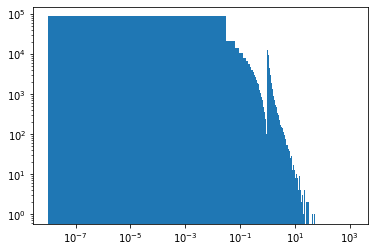

In [17]:
#I would like to dig deeper into the last 6 categories in order to further analyse similar traits between success and failed
#Compare their average goal, pledged per backer, number of backers, Total number of kickstarters
#Explaining why perc_pledge is higher in the technology category than in the 3 most successful ones
#Trying to see the dist of prc pledge (range of values way too spread)


In [ ]:
#same observation as in the cell above, but clearer
sns.boxplot(x)

In [ ]:
#trying to plot dist by goal... same thing
sns.distplot(df_status.usd_goal_real, bins = (5))

In [ ]:
#95% of the real mean of kickstarts that succeed
p = len(df_status[df_status.state_n == 1]) / len(df_status.state_n)
n = len(df_status.state_n)
alpha = 0.95
escale = np.sqrt((p*(1-p))/n)
inter = norm.interval(alpha, p , escale)

In [ ]:
df_status2

In [ ]:
#Scatter plot betwwen number of backers and % pledged
sns.lmplot(x = 'backers', y = 'state_n', data = df_status2)

In [25]:
df_status.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,length,perc_pledged,year,month,state_n,pledge_backer
ID,1.000000,-0.000001,0.000630,0.000905,-0.000559,0.000071,0.000009,0.002301,-0.000897,-0.001434,0.000738,0.000309,-0.001420
goal,-0.000001,1.000000,0.009847,0.005911,0.007632,0.007146,0.949787,0.023301,-0.005302,0.015330,0.001334,-0.025766,0.017307
pledged,0.000630,0.009847,1.000000,0.716918,0.857937,0.953284,0.007257,0.007308,0.324135,0.034627,0.003108,0.105991,0.083077
backers,0.000905,0.005911,0.716918,1.000000,0.697331,0.752071,0.006717,-0.001450,0.394786,0.021111,-0.002001,0.122022,0.007984
usd pledged,-0.000559,0.007632,0.857937,0.697331,1.000000,0.907878,0.008663,0.007015,0.259438,-0.004760,-0.005971,0.092537,0.070133
usd_pledged_real,0.000071,0.007146,0.953284,0.752071,0.907878,1.000000,0.007974,0.007939,0.333419,0.026680,0.000545,0.105055,0.082271
usd_goal_real,0.000009,0.949787,0.007257,0.006717,0.008663,0.007974,1.000000,0.023615,-0.005128,0.012097,0.001290,-0.024940,0.019443
length,0.002301,0.023301,0.007308,-0.001450,0.007015,0.007939,0.023615,1.000000,-0.023268,-0.170397,-0.015556,-0.125275,0.025307
perc_pledged,-0.000897,-0.005302,0.324135,0.394786,0.259438,0.333419,-0.005128,-0.023268,1.000000,0.026313,-0.000802,0.185967,0.032697
year,-0.001434,0.015330,0.034627,0.021111,-0.004760,0.026680,0.012097,-0.170397,0.026313,1.000000,-0.087758,-0.083537,0.016932
